In [1]:
import re, glob, os, collections, scipy
import numpy as np
# import dask
from matplotlib import colors as mcolors
from IPython.display import Image
# import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, date
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
# import sklearn.svm as svm
from scipy import stats

# import plotly.tools as tls
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go
# import plotly.express as px
# import chart_studio.plotly as py
# import plotly.io as pio

# from sklearn.preprocessing import label_binarize
# from netZooPy.panda.panda import Panda
# from netZooPy.lioness.lioness import Lioness
# from netZooPy.milipeed.milipeed import Milipeed
# from netZooPy.milipeed.validate_milipeed import ValidateMilipeed

In [2]:
os.getcwd()
os.chdir('../../..')
os.getcwd()


'/Users/redmo'

In [3]:
filename='data/MotifPipeline/remap/remap2020_all_macs2_hg38_v1_0.bed'

In [4]:
# pattern='H1'
# for chunk in pd.read_csv(filename, chunksize=1000000,sep='\t',usecols=[0,1,2,3,6,7],names=['chr','start','end','cell','S2','E2']):
#     chunk=chunk[chunk['cell'].str.contains(pat=pattern)]
    
#     chunk['gene']=(chunk['cell'].str.split('.', expand=True).rename(columns=lambda x: f"string_{x+1}"))['string_2']
#     del chunk['cell']
#     chunk[['chr','start','end','gene']].to_csv('data/MotifPipeline/remap/'+pattern+'_fullRE2020.txt',sep='\t', mode='a',index=False, header=False)
#     chunk['start']=chunk['S2']
#     chunk['end']=chunk['E2']
#     del chunk['S2']
#     del chunk['E2']
#     chunk.to_csv('data/MotifPipeline/remap/'+pattern+'_spRE2020.txt',sep='\t', mode='a',index=False, header=False)


<function matplotlib.pyplot.show(*args, **kw)>

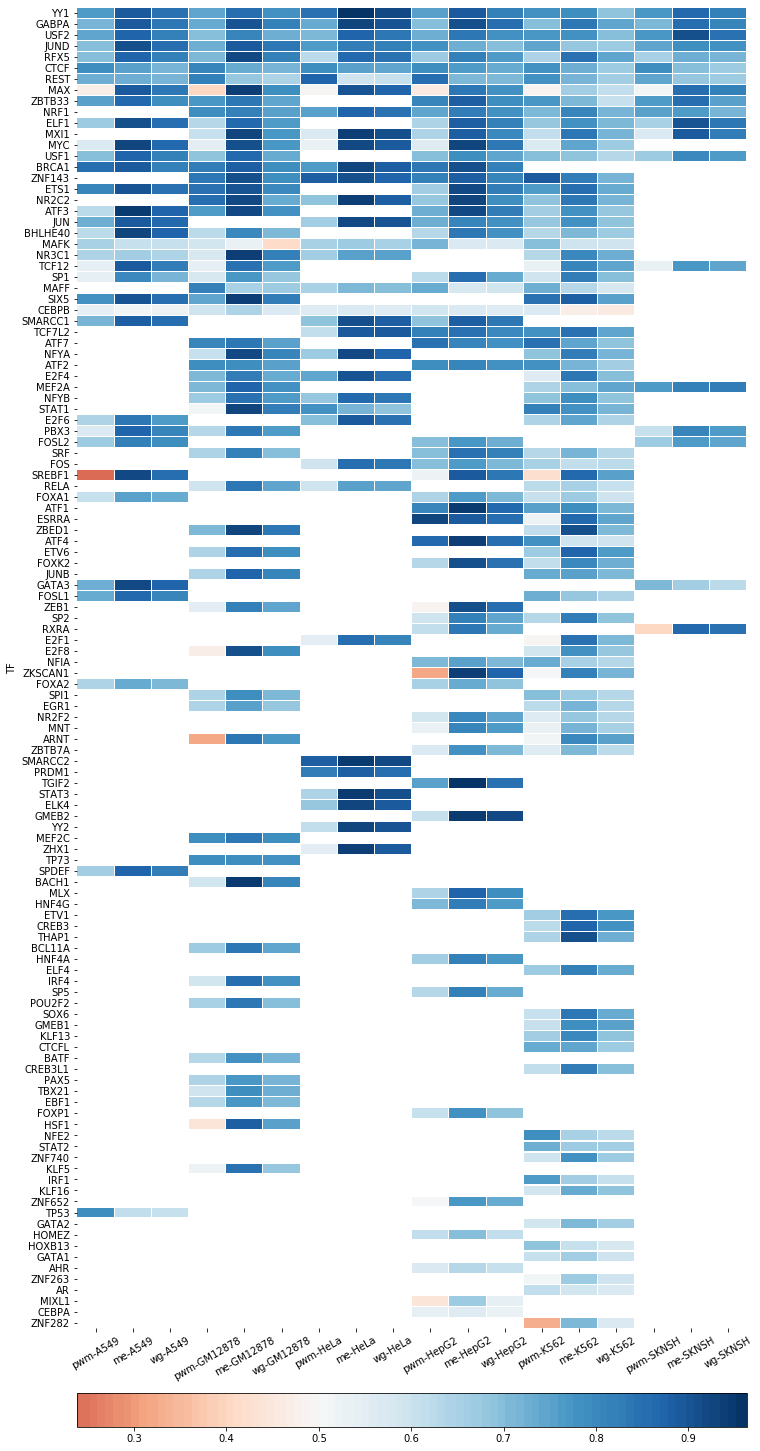

In [5]:
# table2=table
# table.to_csv('data/MotifPipeline/PRE_overall.txt')
aurocs=pd.read_table('data/MotifPipeline/test/sthlm_motif55QC/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,3,4,5,6,7,8],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'])
aurocs=aurocs[aurocs.cell!='0']
# aurocs=pd.DataFrame(table)
# aurocs['wg_auroc']=aurocs['wgbs_auroc']-aurocs['mo_auroc']
# aurocs['me_auroc']=aurocs['me_auroc']-aurocs['mo_auroc']
# aurocs['wg_aupr']=aurocs['wgbs_aupr']-aurocs['mo_aupr']
# aurocs['me_aupr']=aurocs['me_aupr']-aurocs['mo_aupr']
# aurocs.drop(['mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'],axis=1,inplace=True)
# aurocs=aurocs[aurocs['wgbs_auroc_imp']>.2]
aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr'],axis=1,inplace=True)


###PLOT
# measure="wg_auroc"
measure='auroc'

##sum across cells and sort
heat=aurocs.pivot_table(index=['TF'], columns='cell')
# heat=heat[[measure]]
heat['mean']=np.nanmean(heat,axis=1)
heat['count']=heat.isnull().sum(axis=1)
heat['count']=(21-heat['count'])
# heat=heat.sort_values(by=['count'],ascending=True)
# heat=heat.sort_values(by=['mean'],ascending=False)
heat['weight']=heat['mean']*(heat['count'])
heat=heat.sort_values(by=['weight'],ascending=False)
# heat=heat[heat.index.str.contains(pat='CEB')]

# heat=heat[heat['count']==5]
# heat=heat[heat['mean']<0.1]
# del heat.iloc[:,0]
heat=heat.dropna(axis=1, how='all')
del heat['count']
del heat['mean']
del heat['weight']
# heat['sum']=heat.isnull().sum(axis=0)
# heat=heat.sort_values(by=['sum'],ascending=True)
# del heat['sum']
heat=pd.DataFrame(heat.to_records())

heat.columns=['TF','me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
             'pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
             'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

# heat=heat[['TF','pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#           'me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']]


heat=heat[['TF','pwm-A549','me-A549','wg-A549',
           'pwm-GM12878','me-GM12878','wg-GM12878',
           'pwm-HeLa', 'me-HeLa','wg-HeLa',
           'pwm-HepG2','me-HepG2','wg-HepG2',
           'pwm-K562','me-K562','wg-K562',
           'pwm-SKNSH','me-SKNSH','wg-SKNSH']]
heat55=heat
heat=heat.set_index('TF')

plt.figure(figsize=(12, 30))
# grid_kws = {"height_ratios": (60,12), "hspace": .3}

# f, (ax, cbar_ax) = plt.subplots(2)#, gridspec_kw=grid_kws)
# rdgn = sns.diverging_palette(h_neg=200, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
# rdgn=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
rdgn=sns.color_palette("RdBu", 100)
ax = sns.heatmap(heat, center=.5,linewidth=.1,cmap=rdgn, cbar=False)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
mappable = ax.get_children()[0]
plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40
plt.xticks(rotation=30)
# plt.imshow(heat, cmap='hot', interpolation='nearest')
# ax= sns.heatmap(heat, center=.5,cmap=rdgn,linewidth=.1)
# ax= sns.heatmap(heat, linewidth=.1,cmap="YlGnBu")

plt.savefig("data/MotifPipeline/test/sthlm_motif55QC/sthml_"+measure+"_heat55QC.png",dpi=300,bbox_inches = "tight")
plt.show

In [6]:
[(heat55['pwm-A549'].dropna().shape),(heat55['pwm-GM12878'].dropna().shape),(heat55['pwm-HeLa'].dropna().shape),(heat55['pwm-HepG2'].dropna().shape),(heat55['pwm-K562'].dropna().shape),(heat55['pwm-SKNSH'].dropna().shape)]

[(34,), (57,), (35,), (59,), (80,), (19,)]

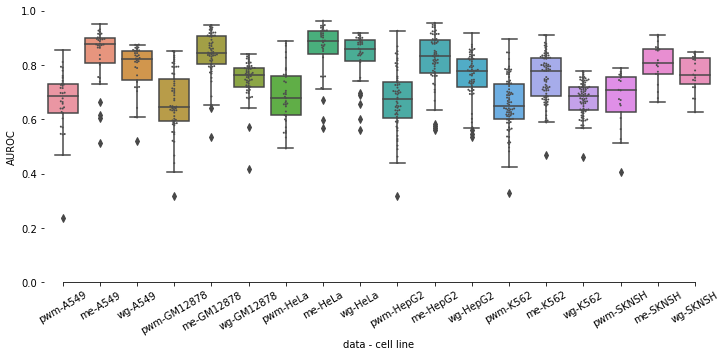

In [7]:
# aurocs=pd.read_table('data/MotifPipeline/test/sthlm_motif55/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,3,4,5,6,7,8],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'])
# aurocs=aurocs[aurocs.cell!='0']
# aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr'],axis=1,inplace=True)


# ###PLOT
# # measure="wg_auroc"
# measure='auroc'

# ##sum across cells and sort
# heat=aurocs.pivot_table(index=['TF'], columns='cell')
# # heat=heat[[measure]]
# heat['mean']=np.nanmean(heat,axis=1)
# heat['count']=heat.isnull().sum(axis=1)
# heat['count']=(21-heat['count'])
# # heat=heat.sort_values(by=['count'],ascending=True)
# # heat=heat.sort_values(by=['mean'],ascending=False)
# heat['weight']=heat['mean']*(heat['count'])
# heat=heat.sort_values(by=['weight'],ascending=False)

# heat=heat.dropna(axis=1, how='all')
# del heat['count']
# del heat['mean']
# del heat['weight']
# box=pd.DataFrame(heat.to_records())
# mask = box.isnull()
# box.columns=['TF','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#              'wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

# box=box[['TF','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#           'me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']]
box=heat55
# box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
meltbox=pd.melt(box,id_vars=['TF'])
# del box.TF
meltbox.columns=['TF','data - cell line','AUROC']
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
g=sns.boxplot(x='data - cell line',y='AUROC', data=meltbox)
g=sns.swarmplot(x='data - cell line',y='AUROC', data=meltbox,
              size=2, color=".3", linewidth=0)
g.set(ylim=(0, 1))
plt.savefig("data/MotifPipeline/test/sthlm_motif55QC/sthml_"+measure+"_box55QC.png",dpi=300,bbox_inches = "tight")
plt.show
# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)
# plt.show()

In [8]:
t0a, p0a = stats.ttest_ind(box['pwm-A549'].dropna(),box['wg-A549'].dropna())
t0b, p0b = stats.ttest_ind(box['pwm-A549'].dropna(),box['me-A549'].dropna())
t1a, p1a = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['wg-GM12878'].dropna())
t1b, p1b = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['me-GM12878'].dropna())
t2a, p2a = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['wg-HeLa'].dropna())
t2b, p2b = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['me-HeLa'].dropna())
t3a, p3a = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['wg-HepG2'].dropna())
t3b, p3b = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['me-HepG2'].dropna())
t4a, p4a = stats.ttest_ind(box['pwm-K562'].dropna(),box['wg-K562'].dropna())
t4b, p4b = stats.ttest_ind(box['pwm-K562'].dropna(),box['me-K562'].dropna())
t5a, p5a = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['wg-SKNSH'].dropna())
t5b, p5b = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['me-SKNSH'].dropna())


# initialise data of lists. 
ttest = {'WG ttest':[t0a,t1a,t2a,t3a,t4a,t5a], 'WG pvalue':[p0a,p1a,p2a,p3a,p4a,p5a], 'Me ttest':[t0b,t1b,t2b,t3b,t4b,t5b],'Me pvalue':[p0b,p1b,p2b,p3b,p4b,p5b]} 
  
# Creates pandas DataFrame. 
df_ttest = pd.DataFrame(ttest, index =['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']) 

df_ttest

,WG ttest,WG pvalue,Me ttest,Me pvalue
A549,-4.978817,4.860659e-06,-6.363271,2.158880e-08
GM12878,-4.916436,3.040869e-06,-9.569441,3.258597e-16
HeLa,-6.094002,5.820766e-08,-6.943498,1.792774e-09
HepG2,-4.703310,7.119266e-06,-7.443623,1.868277e-11
K562,-1.527632,1.286033e-01,-6.495265,1.024789e-09
SKNSH,-3.356166,1.874960e-03,-4.451934,7.908141e-05


<function matplotlib.pyplot.show(*args, **kw)>

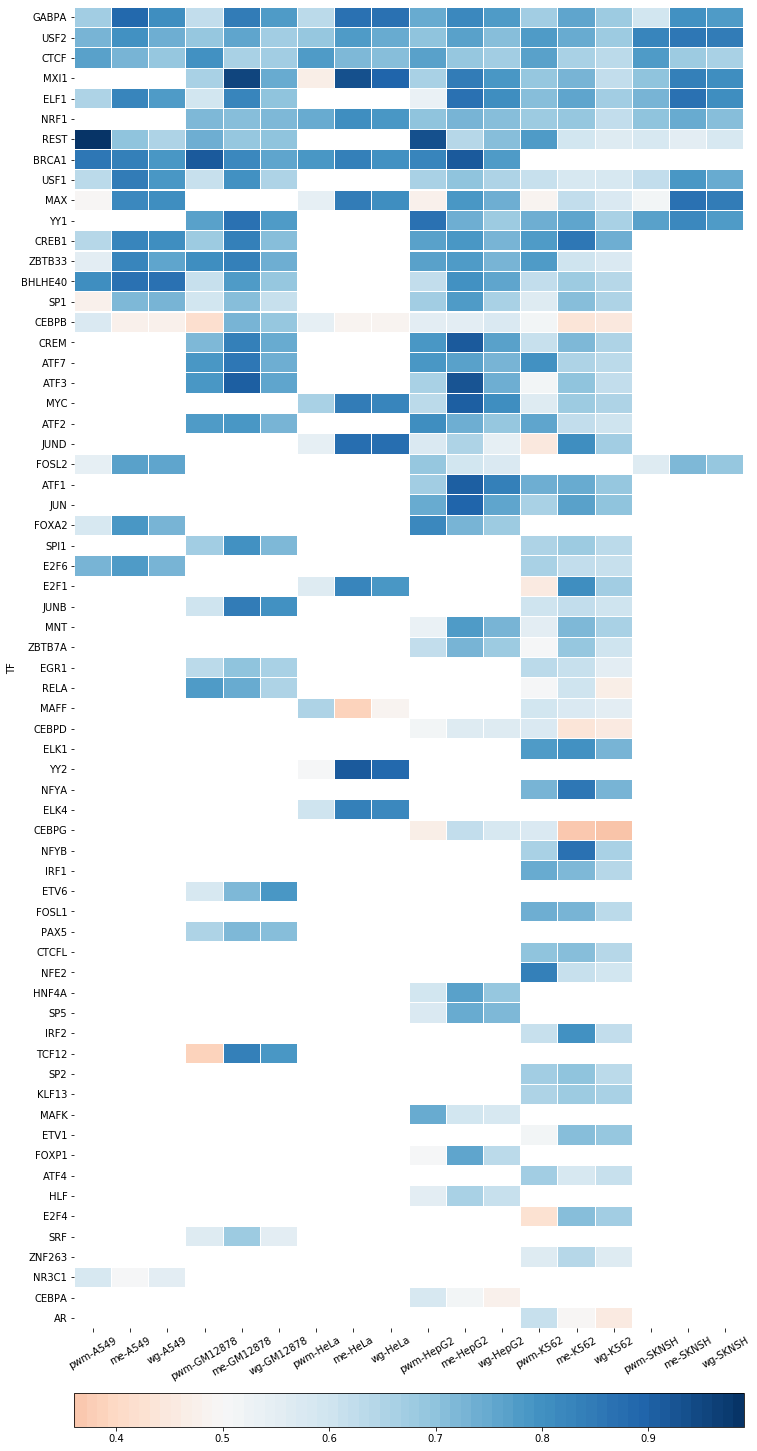

In [9]:
# table2=table
# table.to_csv('data/MotifPipeline/PRE_overall.txt')
aurocs=pd.read_table('data/MotifPipeline/test/sthlm_motif00QC/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,3,4,5,6,7,8],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'])
aurocs=aurocs[aurocs.cell!='0']
# aurocs=pd.DataFrame(table)
# aurocs['wg_auroc']=aurocs['wgbs_auroc']-aurocs['mo_auroc']
# aurocs['me_auroc']=aurocs['me_auroc']-aurocs['mo_auroc']
# aurocs['wg_aupr']=aurocs['wgbs_aupr']-aurocs['mo_aupr']
# aurocs['me_aupr']=aurocs['me_aupr']-aurocs['mo_aupr']
# aurocs.drop(['mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'],axis=1,inplace=True)
# aurocs=aurocs[aurocs['wgbs_auroc_imp']>.2]
aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr'],axis=1,inplace=True)


###PLOT
# measure="wg_auroc"
measure='auroc'

##sum across cells and sort
heat=aurocs.pivot_table(index=['TF'], columns='cell')
# heat=heat[[measure]]
heat['mean']=np.nanmean(heat,axis=1)
heat['count']=heat.isnull().sum(axis=1)
heat['count']=(21-heat['count'])
# heat=heat.sort_values(by=['count'],ascending=True)
# heat=heat.sort_values(by=['mean'],ascending=False)
heat['weight']=heat['mean']*(heat['count'])
heat=heat.sort_values(by=['weight'],ascending=False)
# heat=heat[heat.index.str.contains(pat='CEB')]

# heat=heat[heat['count']==5]
# heat=heat[heat['mean']<0.1]
# del heat.iloc[:,0]
heat=heat.dropna(axis=1, how='all')
del heat['count']
del heat['mean']
del heat['weight']
# heat['sum']=heat.isnull().sum(axis=0)
# heat=heat.sort_values(by=['sum'],ascending=True)
# del heat['sum']
heat=pd.DataFrame(heat.to_records())

heat.columns=['TF','me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
             'pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
             'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

# heat=heat[['TF','pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#           'me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']]
heat=heat[['TF','pwm-A549','me-A549','wg-A549',
           'pwm-GM12878','me-GM12878','wg-GM12878',
           'pwm-HeLa', 'me-HeLa','wg-HeLa',
           'pwm-HepG2','me-HepG2','wg-HepG2',
           'pwm-K562','me-K562','wg-K562',
           'pwm-SKNSH','me-SKNSH','wg-SKNSH']]
heat00=heat
heat=heat.set_index('TF')

plt.figure(figsize=(12, 30))
# grid_kws = {"height_ratios": (60,12), "hspace": .3}

# f, (ax, cbar_ax) = plt.subplots(2)#, gridspec_kw=grid_kws)
# rdgn = sns.diverging_palette(h_neg=200, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
# rdgn=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
rdgn=sns.color_palette("RdBu", 100)
ax = sns.heatmap(heat, center=.5,linewidth=.1,cmap=rdgn, cbar=False)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
mappable = ax.get_children()[0]
plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40
plt.xticks(rotation=30)
# plt.imshow(heat, cmap='hot', interpolation='nearest')
# ax= sns.heatmap(heat, center=.5,cmap=rdgn,linewidth=.1)
# ax= sns.heatmap(heat, linewidth=.1,cmap="YlGnBu")

plt.savefig("data/MotifPipeline/test/sthlm_motif00QC/sthml_"+measure+"_heat00QC.png",dpi=300,bbox_inches = "tight")
plt.show

In [10]:
[(heat00['pwm-A549'].dropna().shape),(heat00['pwm-GM12878'].dropna().shape),(heat00['pwm-HeLa'].dropna().shape),(heat00['pwm-HepG2'].dropna().shape),(heat00['pwm-K562'].dropna().shape),(heat00['pwm-SKNSH'].dropna().shape)]

[(17,), (27,), (14,), (36,), (49,), (11,)]

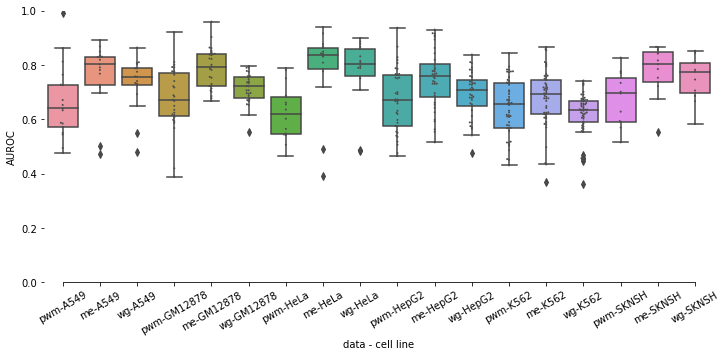

In [11]:
# aurocs=pd.read_table('data/MotifPipeline/test/sthlm_motif55/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,3,4,5,6,7,8],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'])
# aurocs=aurocs[aurocs.cell!='0']
# aurocs.drop(['mo_auroc','wgbs_auroc','me_auroc'],axis=1,inplace=True)


# ###PLOT
# # measure="wg_auroc"
# measure='aupr'

# ##sum across cells and sort
# heat=aurocs.pivot_table(index=['TF'], columns='cell')
# # heat=heat[[measure]]
# heat['mean']=np.nanmean(heat,axis=1)
# heat['count']=heat.isnull().sum(axis=1)
# heat['count']=(21-heat['count'])
# # heat=heat.sort_values(by=['count'],ascending=True)
# # heat=heat.sort_values(by=['mean'],ascending=False)
# heat['weight']=heat['mean']*(heat['count'])
# heat=heat.sort_values(by=['weight'],ascending=False)

# heat=heat.dropna(axis=1, how='all')
# del heat['count']
# del heat['mean']
# del heat['weight']
# box=pd.DataFrame(heat.to_records())
# mask = box.isnull()
# box.columns=['TF','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#              'wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

# box=box[['TF','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#           'me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']]
box=heat00
# box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
meltbox00=pd.melt(box,id_vars=['TF'])
# del box.TF
meltbox00.columns=['TF','data - cell line','AUROC']
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
g=sns.boxplot(x='data - cell line',y='AUROC', data=meltbox00)
g=sns.swarmplot(x='data - cell line',y='AUROC', data=meltbox00,
              size=2, color=".3", linewidth=0)
g.set(ylim=(0, 1))

plt.savefig("data/MotifPipeline/test/sthlm_motif00QC/sthml_"+measure+"_box00QC.png",dpi=300,bbox_inches = "tight")
plt.show
# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)
# plt.show()

In [12]:
t0a, p0a = stats.ttest_ind(box['pwm-A549'].dropna(),box['wg-A549'].dropna())
t0b, p0b = stats.ttest_ind(box['pwm-A549'].dropna(),box['me-A549'].dropna())
t1a, p1a = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['wg-GM12878'].dropna())
t1b, p1b = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['me-GM12878'].dropna())
t2a, p2a = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['wg-HeLa'].dropna())
t2b, p2b = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['me-HeLa'].dropna())
t3a, p3a = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['wg-HepG2'].dropna())
t3b, p3b = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['me-HepG2'].dropna())
t4a, p4a = stats.ttest_ind(box['pwm-K562'].dropna(),box['wg-K562'].dropna())
t4b, p4b = stats.ttest_ind(box['pwm-K562'].dropna(),box['me-K562'].dropna())
t5a, p5a = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['wg-SKNSH'].dropna())
t5b, p5b = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['me-SKNSH'].dropna())


# initialise data of lists. 
ttest = {'WG ttest':[t0a,t1a,t2a,t3a,t4a,t5a], 'WG pvalue':[p0a,p1a,p2a,p3a,p4a,p5a], 'Me ttest':[t0b,t1b,t2b,t3b,t4b,t5b],'Me pvalue':[p0b,p1b,p2b,p3b,p4b,p5b]} 
  
# Creates pandas DataFrame. 
df_ttest = pd.DataFrame(ttest, index =['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']) 

df_ttest

,WG ttest,WG pvalue,Me ttest,Me pvalue
A549,-1.693359,0.100102,-2.329645,0.026295
GM12878,-1.549671,0.127286,-4.242538,0.000091
HeLa,-3.295611,0.002840,-3.219438,0.003433
HepG2,-0.846493,0.400162,-2.908867,0.004858
K562,1.333499,0.185523,-1.640848,0.104101
SKNSH,-1.995641,0.059774,-2.467190,0.022771


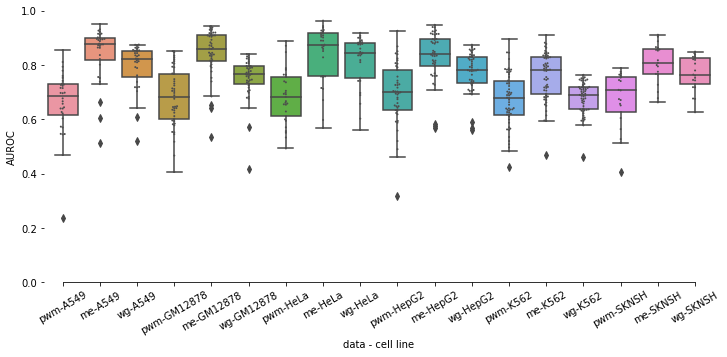

In [13]:
box=heat55.iloc[heat00.index]

# box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
meltbox55=pd.melt(box,id_vars=['TF'])
# del box.TF
meltbox55.columns=['TF','data - cell line','AUROC']
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
g=sns.boxplot(x='data - cell line',y='AUROC', data=meltbox55)
g=sns.swarmplot(x='data - cell line',y='AUROC', data=meltbox55,
              size=2, color=".3", linewidth=0)
g.set(ylim=(0, 1))

plt.savefig("data/MotifPipeline/test/sthlm_motif55QC/sthml_"+measure+"_box55x00QC.png",dpi=300,bbox_inches = "tight")
meltbox55.to_csv("data/MotifPipeline/test/sthlm_motif55QC/sthml_"+measure+"_box55x00QC.txt")

plt.show
# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)
# plt.show()

In [14]:
t0a, p0a = stats.ttest_ind(box['pwm-A549'].dropna(),box['wg-A549'].dropna())
t0b, p0b = stats.ttest_ind(box['pwm-A549'].dropna(),box['me-A549'].dropna())
t1a, p1a = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['wg-GM12878'].dropna())
t1b, p1b = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['me-GM12878'].dropna())
t2a, p2a = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['wg-HeLa'].dropna())
t2b, p2b = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['me-HeLa'].dropna())
t3a, p3a = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['wg-HepG2'].dropna())
t3b, p3b = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['me-HepG2'].dropna())
t4a, p4a = stats.ttest_ind(box['pwm-K562'].dropna(),box['wg-K562'].dropna())
t4b, p4b = stats.ttest_ind(box['pwm-K562'].dropna(),box['me-K562'].dropna())
t5a, p5a = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['wg-SKNSH'].dropna())
t5b, p5b = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['me-SKNSH'].dropna())


# initialise data of lists. 
ttest = {'WG ttest':[t0a,t1a,t2a,t3a,t4a,t5a], 'WG pvalue':[p0a,p1a,p2a,p3a,p4a,p5a], 'Me ttest':[t0b,t1b,t2b,t3b,t4b,t5b],'Me pvalue':[p0b,p1b,p2b,p3b,p4b,p5b]} 
  
# Creates pandas DataFrame. 
df_ttest = pd.DataFrame(ttest, index =['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']) 

df_ttest

,WG ttest,WG pvalue,Me ttest,Me pvalue
A549,-5.194879,0.000002,-6.603027,1.041042e-08
GM12878,-3.634192,0.000474,-7.875468,9.440535e-12
HeLa,-5.120847,0.000004,-5.850806,2.654843e-07
HepG2,-3.853791,0.000221,-6.140776,2.314185e-08
K562,-0.499164,0.618643,-4.869593,3.699531e-06
SKNSH,-3.356166,0.001875,-4.451934,7.908141e-05


<function matplotlib.pyplot.show(*args, **kw)>

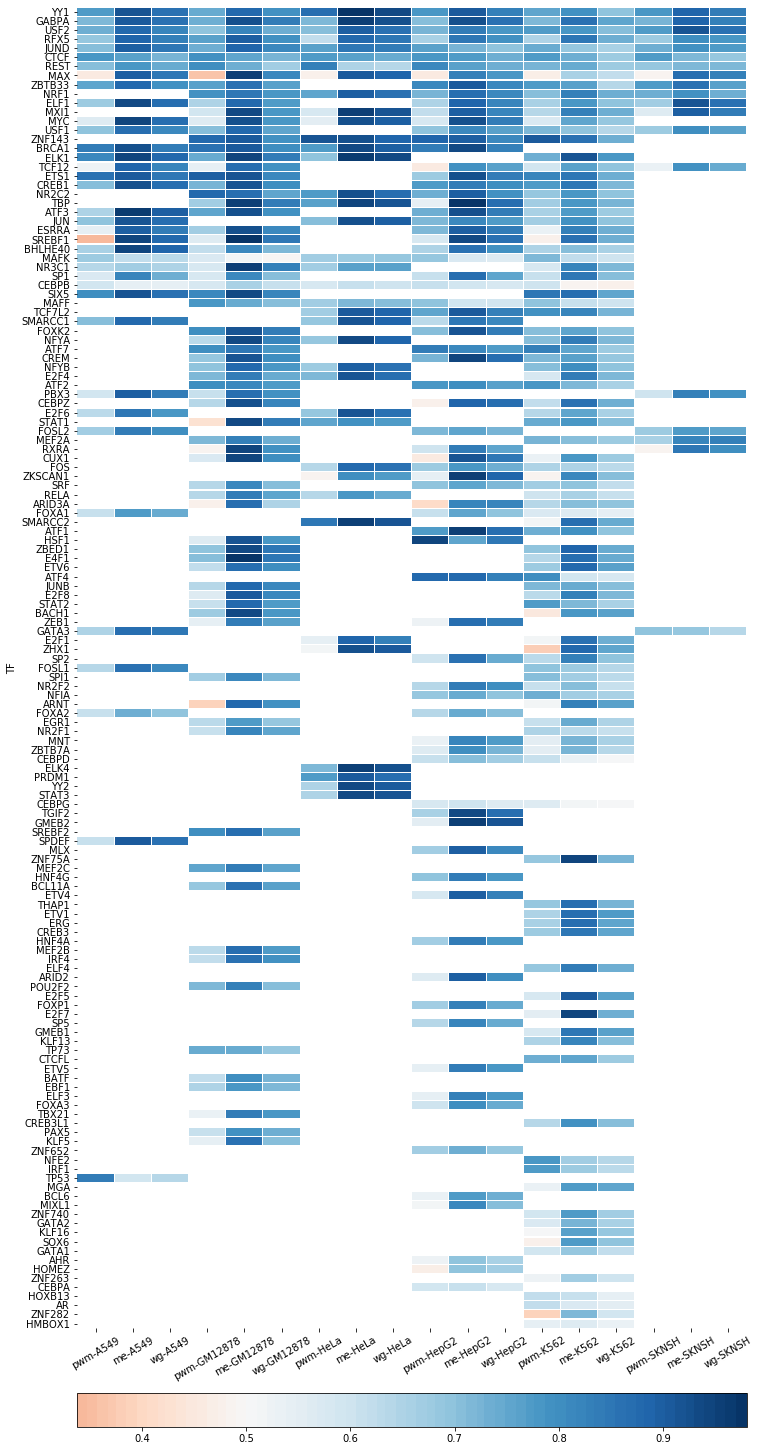

In [15]:
# table2=table
# table.to_csv('data/MotifPipeline/PRE_overall.txt')
aurocs=pd.read_table('data/MotifPipeline/test/sthlm_motif1010QC/sthlm_PRE_overall.txt',sep=',',usecols=[1,2,3,4,5,6,7,8],names=['cell','TF','mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'])
aurocs=aurocs[aurocs.cell!='0']
# aurocs=pd.DataFrame(table)
# aurocs['wg_auroc']=aurocs['wgbs_auroc']-aurocs['mo_auroc']
# aurocs['me_auroc']=aurocs['me_auroc']-aurocs['mo_auroc']
# aurocs['wg_aupr']=aurocs['wgbs_aupr']-aurocs['mo_aupr']
# aurocs['me_aupr']=aurocs['me_aupr']-aurocs['mo_aupr']
# aurocs.drop(['mo_auroc','wgbs_auroc','me_auroc','mo_aupr','wgbs_aupr','me_aupr'],axis=1,inplace=True)
# aurocs=aurocs[aurocs['wgbs_auroc_imp']>.2]
aurocs.drop(['mo_aupr','wgbs_aupr','me_aupr'],axis=1,inplace=True)


###PLOT
# measure="wg_auroc"
measure='auroc'

##sum across cells and sort
heat=aurocs.pivot_table(index=['TF'], columns='cell')
# heat=heat[[measure]]
heat['mean']=np.nanmean(heat,axis=1)
heat['count']=heat.isnull().sum(axis=1)
heat['count']=(21-heat['count'])
# heat=heat.sort_values(by=['count'],ascending=True)
# heat=heat.sort_values(by=['mean'],ascending=False)
heat['weight']=heat['mean']*(heat['count'])
heat=heat.sort_values(by=['weight'],ascending=False)
# heat=heat[heat.index.str.contains(pat='CEB')]

# heat=heat[heat['count']==5]
# heat=heat[heat['mean']<0.1]
# del heat.iloc[:,0]
heat=heat.dropna(axis=1, how='all')
del heat['count']
del heat['mean']
del heat['weight']
# heat['sum']=heat.isnull().sum(axis=0)
# heat=heat.sort_values(by=['sum'],ascending=True)
# del heat['sum']
heat=pd.DataFrame(heat.to_records())

heat.columns=['TF','me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
             'pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
             'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']

# heat=heat[['TF','pwm-A549','pwm-GM12878','pwm-HeLa','pwm-HepG2','pwm-K562','pwm-SKNSH',
#           'me-A549','me-GM12878','me-HeLa','me-HepG2','me-K562','me-SKNSH',
#              'wg-A549','wg-GM12878','wg-HeLa','wg-HepG2','wg-K562','wg-SKNSH']]
heat=heat[['TF','pwm-A549','me-A549','wg-A549',
           'pwm-GM12878','me-GM12878','wg-GM12878',
           'pwm-HeLa', 'me-HeLa','wg-HeLa',
           'pwm-HepG2','me-HepG2','wg-HepG2',
           'pwm-K562','me-K562','wg-K562',
           'pwm-SKNSH','me-SKNSH','wg-SKNSH']]
heat1010=heat
heat=heat.set_index('TF')

plt.figure(figsize=(12, 30))
# grid_kws = {"height_ratios": (60,12), "hspace": .3}

# f, (ax, cbar_ax) = plt.subplots(2)#, gridspec_kw=grid_kws)
# rdgn = sns.diverging_palette(h_neg=200, h_pos=20, s=99, l=55, sep=3, as_cmap=True)
# rdgn=sns.diverging_palette(220, 20, sep=20, as_cmap=True)
rdgn=sns.color_palette("RdBu", 100)
ax = sns.heatmap(heat, center=.5,linewidth=.1,cmap=rdgn, cbar=False)#cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal"})
mappable = ax.get_children()[0]
plt.colorbar(mappable, ax = [ax],orientation = 'horizontal',pad=.04) #.02 with 12x60, .03 for 12x40
plt.xticks(rotation=30)
# plt.imshow(heat, cmap='hot', interpolation='nearest')
# ax= sns.heatmap(heat, center=.5,cmap=rdgn,linewidth=.1)
# ax= sns.heatmap(heat, linewidth=.1,cmap="YlGnBu")

plt.savefig("data/MotifPipeline/test/sthlm_motif1010QC/sthml_"+measure+"_heat1010QC.png",dpi=300,bbox_inches = "tight")
plt.show

In [16]:
[(heat1010['pwm-A549'].dropna().shape),(heat1010['pwm-GM12878'].dropna().shape),(heat1010['pwm-HeLa'].dropna().shape),(heat1010['pwm-HepG2'].dropna().shape),(heat1010['pwm-K562'].dropna().shape),(heat1010['pwm-SKNSH'].dropna().shape)]

[(37,), (73,), (38,), (75,), (100,), (19,)]

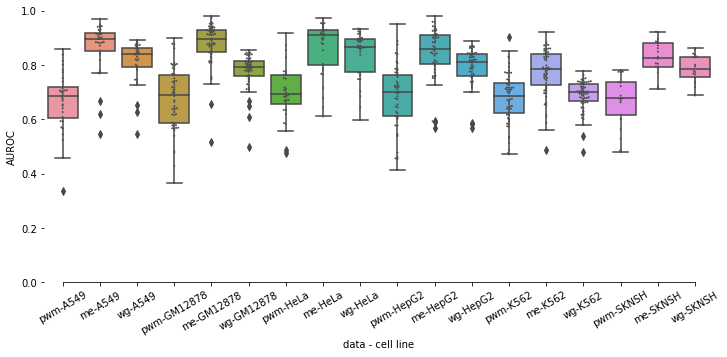

In [17]:
box=heat1010.iloc[heat00.index]

# box.columns=['TF','A549','GM12878','H1','HeLa','HepG2','K562','SKNSH']
meltbox1010=pd.melt(box,id_vars=['TF'])
# del box.TF
meltbox1010.columns=['TF','data - cell line','AUROC']
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
g=sns.boxplot(x='data - cell line',y='AUROC', data=meltbox1010)
g=sns.swarmplot(x='data - cell line',y='AUROC', data=meltbox1010,
              size=2, color=".3", linewidth=0)
g.set(ylim=(0, 1))

plt.savefig("data/MotifPipeline/test/sthlm_motif1010QC/sthml_"+measure+"_box1010x00QC.png",dpi=300,bbox_inches = "tight")
meltbox1010.to_csv("data/MotifPipeline/test/sthlm_motif1010QC/sthml_"+measure+"_box1010x00QC.txt")
plt.show
# Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
sns.despine(trim=True, left=True)
# plt.show()

In [18]:
t0a, p0a = stats.ttest_ind(box['pwm-A549'].dropna(),box['wg-A549'].dropna())
t0b, p0b = stats.ttest_ind(box['pwm-A549'].dropna(),box['me-A549'].dropna())
t1a, p1a = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['wg-GM12878'].dropna())
t1b, p1b = stats.ttest_ind(box['pwm-GM12878'].dropna(),box['me-GM12878'].dropna())
t2a, p2a = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['wg-HeLa'].dropna())
t2b, p2b = stats.ttest_ind(box['pwm-HeLa'].dropna(),box['me-HeLa'].dropna())
t3a, p3a = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['wg-HepG2'].dropna())
t3b, p3b = stats.ttest_ind(box['pwm-HepG2'].dropna(),box['me-HepG2'].dropna())
t4a, p4a = stats.ttest_ind(box['pwm-K562'].dropna(),box['wg-K562'].dropna())
t4b, p4b = stats.ttest_ind(box['pwm-K562'].dropna(),box['me-K562'].dropna())
t5a, p5a = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['wg-SKNSH'].dropna())
t5b, p5b = stats.ttest_ind(box['pwm-SKNSH'].dropna(),box['me-SKNSH'].dropna())


# initialise data of lists. 
ttest = {'WG ttest':[t0a,t1a,t2a,t3a,t4a,t5a], 'WG pvalue':[p0a,p1a,p2a,p3a,p4a,p5a], 'Me ttest':[t0b,t1b,t2b,t3b,t4b,t5b],'Me pvalue':[p0b,p1b,p2b,p3b,p4b,p5b]} 
  
# Creates pandas DataFrame. 
df_ttest = pd.DataFrame(ttest, index =['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']) 

df_ttest

,WG ttest,WG pvalue,Me ttest,Me pvalue
A549,-5.905763,1.605624e-07,-7.502945,2.886247e-10
GM12878,-5.545715,2.165664e-07,-10.409687,6.652271e-18
HeLa,-5.957649,1.312606e-07,-6.786091,5.036418e-09
HepG2,-5.160643,1.366920e-06,-7.261053,1.097366e-10
K562,-0.757988,4.499951e-01,-5.567174,1.695259e-07
SKNSH,-4.673599,4.533247e-05,-5.959243,9.727687e-07


In [19]:
37+73+38+75+100+19


342

In [20]:
meltbox55['buffer']=5
meltbox1010['buffer']=10
meltbox00['buffer']=0
allbox=pd.concat([meltbox1010,meltbox55,meltbox00])
allbox['cell_buff']=allbox['data - cell line']+'_'+allbox['buffer'].astype(str)
allbox

,TF,data - cell line,AUROC,buffer,cell_buff
0,YY1,pwm-A549,0.773653,10,pwm-A549_10
1,GABPA,pwm-A549,0.712411,10,pwm-A549_10
2,USF2,pwm-A549,0.738289,10,pwm-A549_10
3,RFX5,pwm-A549,0.690942,10,pwm-A549_10
4,JUND,pwm-A549,0.705760,10,pwm-A549_10
...,...,...,...,...,...
1165,SRF,wg-SKNSH,NaN,0,wg-SKNSH_0
1166,ZNF263,wg-SKNSH,NaN,0,wg-SKNSH_0
1167,NR3C1,wg-SKNSH,NaN,0,wg-SKNSH_0
1168,CEBPA,wg-SKNSH,NaN,0,wg-SKNSH_0


In [21]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
# col_list = [A549]
cells=['A549','GM12878', 'HeLa', 'HepG2', 'K562','SKNSH']
tests=['pwm','me','wg']
for cell in cells:
    for test in tests:
        allbox2=allbox[allbox['cell_buff'].str.contains(pat=cell)]
        allbox2=allbox2[allbox2['cell_buff'].str.contains(pat=test)]

        g=sns.boxplot(x='cell_buff',y='AUROC', data=allbox2)
        g=sns.swarmplot(x='cell_buff',y='AUROC', data=allbox2,
                      size=2, color=".3", linewidth=0)
        g.set(ylim=(0, 1))

        plt.savefig("data/MotifPipeline/test/sthml_"+cell+test+"_allbox_buff.png",dpi=300,bbox_inches = "tight")
        plt.close()

In [5]:
os.chdir('../../..')

In [4]:
CGcount=pd.read_csv('Desktop/CG_count.txt',sep='\t',header=None,index_col=0)
TOE_count=pd.read_csv('Desktop/TOE_count.txt',sep='\t',header=None,index_col=0)


Text(0.5, 0, 'non-empty CG count per TOE')

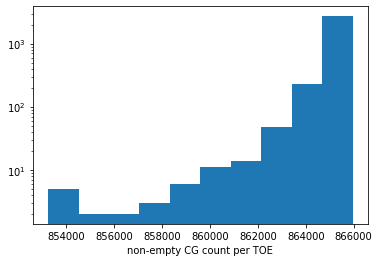

In [7]:
plt.hist(TOE_count.values,log=True)
plt.xlabel('non-empty CG count per TOE')

Text(0.5, 0, 'non-empty TOE count per CG')

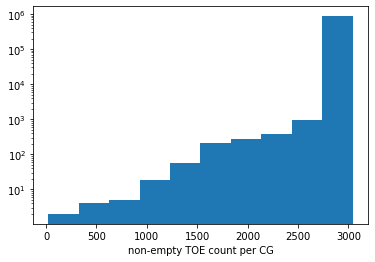

In [8]:
plt.hist(CGcount.values,log=True)
plt.xlabel('non-empty TOE count per CG')

Text(0.5, 0, 'frequency of X percent full per TOE (sum=3041)')

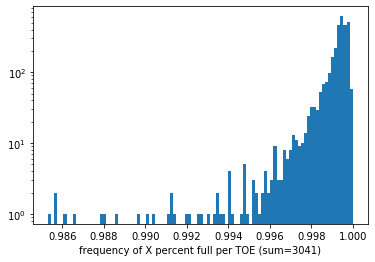

In [32]:
plt.hist((TOE_count/np.max(TOE_count)).values,log=True,bins=100)
plt.xlabel('frequency of X percent full per TOE (sum=3041)')

Text(0.5, 0, 'frequency of X percent full per CG (sum=866000)')

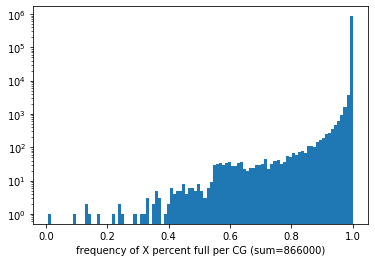

In [33]:
plt.hist((CGcount/np.max(CGcount)).values,log=True,bins=100)
plt.xlabel('frequency of X percent full per CG (sum=866000)')

In [104]:
import pandas as pd
import glob
traces=glob.glob('netZooPy/tests/lioness/*.npy')
append_data = pd.DataFrame()
for i,trace in enumerate(traces):
    data=np.load(trace)
    append_data=pd.concat([append_data,pd.DataFrame(data.flatten())],axis=1)
append_data=append_data.dropna().to_numpy()
np.save('netZooPy/tests/lioness/lioness.all.npy',append_data)

In [109]:
traces=glob.glob('netZooPy/lioness_output/*.npy')
res = pd.DataFrame()
for i,trace in enumerate(traces):
    data=np.load(trace)
    res=pd.concat([res,pd.DataFrame(data.flatten())],axis=1)
res=res.dropna().to_numpy()

In [114]:
pd.DataFrame(res).dropna().shape

(1000000, 50)

In [115]:
res

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.64919621,  0.24342953,  1.0846994 , ..., -0.59017146,
        -0.06899518,  1.48458043],
       [-0.26477513,  0.25645194,  1.17029216, ..., -1.02252986,
        -0.05185048,  0.11791866],
       ...,
       [ 1.71525553,  0.14640285,  0.60336787, ..., -0.19462842,
        -1.24414043, -1.90925283],
       [-2.15323034, -0.12203406, -0.50765614, ..., -1.2913323 ,
         2.86934552,  0.52875369],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]])